In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:

path= 'data'
filelist=os.listdir(path)       

data=pd.DataFrame()
for  p in filelist:
    d=pd.read_csv(os.path.join(path,p)) 
    data=pd.concat([data,d])       

print(data.shape)  
data.head() 

(976072, 7)


,Protein,Peptied,charge,time,ionscore,corr_theo,corr_best_exp
0,1433B_HUMAN,YDDMAAAMK,2,0,47.80,0.990404,-1000.0
1,1433B_HUMAN,YDDMAAAMK,2,1,42.99,0.992927,-1000.0
2,1433B_HUMAN,YDDMAAAMK,2,2,47.82,0.990979,-1000.0
3,1433B_HUMAN,YDDMAAAMK,2,3,42.82,0.992448,-1000.0
4,1433B_HUMAN,YDDMAAAMK,2,4,47.99,0.991099,-1000.0


In [93]:
data["is"]=["z" if x==0 else "nz" for x in data.ionscore]
data.head() 

,Protein,Peptied,charge,time,ionscore,corr_theo,corr_best_exp,is
0,1433B_HUMAN,YDDMAAAMK,2,0,47.80,0.990404,-1000.0,nz
1,1433B_HUMAN,YDDMAAAMK,2,1,42.99,0.992927,-1000.0,nz
2,1433B_HUMAN,YDDMAAAMK,2,2,47.82,0.990979,-1000.0,nz
3,1433B_HUMAN,YDDMAAAMK,2,3,42.82,0.992448,-1000.0,nz
4,1433B_HUMAN,YDDMAAAMK,2,4,47.99,0.991099,-1000.0,nz


In [94]:
nz=data[data.ionscore>0]
print(nz.shape)
nz.describe()

(707913, 8)


,ionscore,corr_theo,corr_best_exp
count,707913.000000,707913.000000,707913.0
mean,45.849633,0.971743,-1000.0
std,21.225318,0.095640,0.0
min,13.930000,-0.917239,-1000.0
25%,29.340000,0.981703,-1000.0
50%,41.900000,0.993605,-1000.0
75%,58.170000,0.997664,-1000.0
max,183.520000,0.999998,-1000.0


In [95]:
z=data[data.ionscore==0]
print(z.shape)
z.describe()

(268159, 8)


,ionscore,corr_theo,corr_best_exp
count,268159.0,268159.000000,268159.000000
mean,0.0,0.920798,0.931617
std,0.0,0.171626,0.146921
min,0.0,-0.967008,-0.968815
25%,0.0,0.932721,0.938324
50%,0.0,0.979624,0.980762
75%,0.0,0.993837,0.994315
max,0.0,0.999993,1.000000


In [96]:
z.sort_values(by="corr_theo").head(5)

,Protein,Peptied,charge,time,ionscore,corr_theo,corr_best_exp,is
255,UBA3_HUMAN,SGPFTHPDFEPSTESLQFLLDTcK,3,16,0.0,-0.967008,-0.968815,z
673,CHD4_HUMAN,EFEMWAPDMYVVTYVGDKDSR,3,26,0.0,-0.956874,-0.946912,z
2016,MYH9_HUMAN,LEGDSTDLSDQIAELQAQIAELK,3,34,0.0,-0.952702,-0.934289,z
318,TKFC_HUMAN,VALLSGGGSGHEPAHAGFIGK,3,38,0.0,-0.891219,-0.073698,z
258,CND2_HUMAN,DAPSLEEVEGHVADGSATEMGTTK,3,7,0.0,-0.881658,-0.688803,z


In [97]:
# sns.kdeplot(data=z, x="corr_theo")

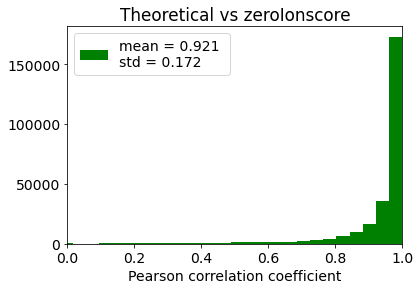

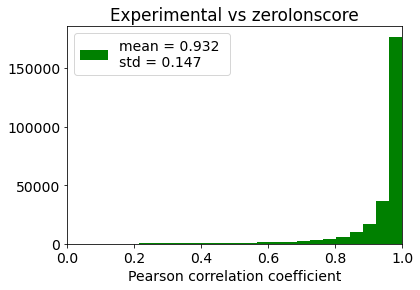

In [98]:
plt.rc("font",size=14)
plt.hist(z.corr_theo,bins=50,color="g",label="mean = {:.3f} \nstd = {:.3f}".format(z.corr_theo.mean(),z.corr_theo.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Theoretical vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

plt.show()

plt.hist(z.corr_best_exp,color="g",bins=50,label="mean = {:.3f} \nstd = {:.3f}".format(z.corr_best_exp.mean(),z.corr_best_exp.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Experimental vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

In [99]:
z["Type"]=[x.split("_")[1] for x in z.Protein]
z

C:\Users\HMDEBE~1.UTM\AppData\Local\Temp/ipykernel_31412/1462262934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z["Type"]=[x.split("_")[1] for x in z.Protein]


,Protein,Peptied,charge,time,ionscore,corr_theo,corr_best_exp,is,Type
79,1433B_HUMAN,DSTLIMQLLR,2,1,0.0,0.999748,0.999953,z,HUMAN
117,1433B_HUMAN,DSTLImQLLR,2,30,0.0,0.859687,0.855809,z,HUMAN
169,1433B_HUMAN,IEAELQDIcNDVLELLDK,2,1,0.0,0.998095,0.998948,z,HUMAN
170,1433B_HUMAN,IEAELQDIcNDVLELLDK,2,2,0.0,0.992806,0.994877,z,HUMAN
171,1433B_HUMAN,IEAELQDIcNDVLELLDK,2,3,0.0,0.995255,0.996685,z,HUMAN
...,...,...,...,...,...,...,...,...,...
209,ZYX_HUMAN,SPSSSQPLPQVPAPAQSQTQFHVQPQPQPKPQVQLHVQSQTQPVSL...,5,25,0.0,0.928925,0.688833,z,HUMAN
210,ZYX_HUMAN,SPSSSQPLPQVPAPAQSQTQFHVQPQPQPKPQVQLHVQSQTQPVSL...,5,26,0.0,0.584462,0.579640,z,HUMAN
211,ZYX_HUMAN,SPSSSQPLPQVPAPAQSQTQFHVQPQPQPKPQVQLHVQSQTQPVSL...,5,31,0.0,0.644581,0.606684,z,HUMAN
212,ZYX_HUMAN,SPSSSQPLPQVPAPAQSQTQFHVQPQPQPKPQVQLHVQSQTQPVSL...,5,32,0.0,0.364155,0.404356,z,HUMAN


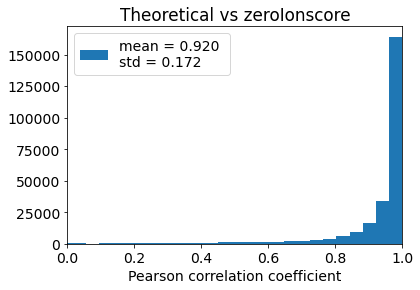

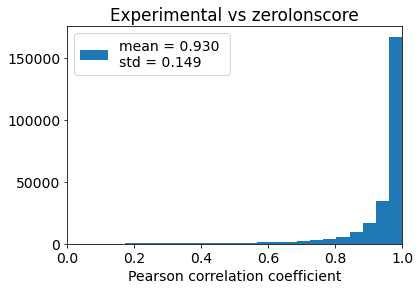

In [100]:
human=z[z.Type=="HUMAN"]

plt.rc("font",size=14)
plt.hist(human.corr_theo,bins=50,label="mean = {:.3f} \nstd = {:.3f}".format(human.corr_theo.mean(),human.corr_theo.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Theoretical vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

plt.show()

plt.hist(human.corr_best_exp,bins=50,label="mean = {:.3f} \nstd = {:.3f}".format(human.corr_best_exp.mean(),human.corr_best_exp.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Experimental vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

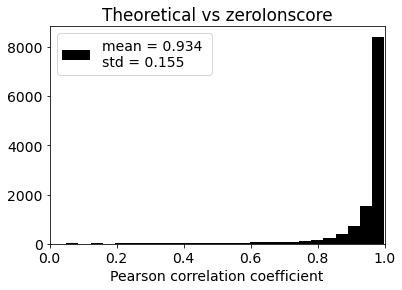

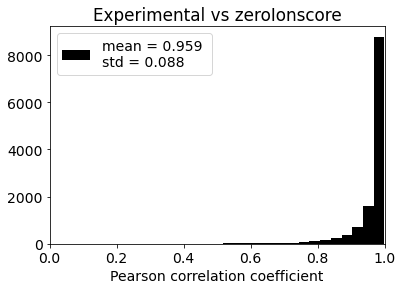

In [101]:
yeast=z[z.Type=="YEAST"]

plt.rc("font",size=14)
plt.hist(yeast.corr_theo,bins=50,color="k",label="mean = {:.3f} \nstd = {:.3f}".format(yeast.corr_theo.mean(),yeast.corr_theo.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Theoretical vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

plt.show()

plt.hist(yeast.corr_best_exp,bins=50,color="k",label="mean = {:.3f} \nstd = {:.3f}".format(yeast.corr_best_exp.mean(),yeast.corr_best_exp.std()))
plt.xlabel("Pearson correlation coefficient")
plt.title("Experimental vs zeroIonscore")
plt.xlim([0,1])
plt.legend()

In [124]:
yeast.sort_values(by="corr_best_exp").head(50)

,Protein,Peptied,charge,time,ionscore,corr_theo,corr_best_exp,is,Type
116,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,36,0.0,-0.622050,-0.603529,z,YEAST
467,PDC1_YEAST,MSANISETTAmITDIATAPAEIDR,3,23,0.0,-0.828382,-0.587176,z,YEAST
469,PDC1_YEAST,MSANISETTAmITDIATAPAEIDR,3,30,0.0,-0.800758,-0.558615,z,YEAST
112,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,30,0.0,-0.670549,-0.530037,z,YEAST
117,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,37,0.0,-0.294959,-0.502016,z,YEAST
454,EF2_YEAST,AEPIDEEVSLAIENGIINPR,3,12,0.0,-0.426807,-0.463130,z,YEAST
319,EF2_YEAST,ADLMLYVSK,2,5,0.0,-0.158348,-0.213084,z,YEAST
119,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,39,0.0,-0.052658,-0.188945,z,YEAST
111,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,29,0.0,-0.150548,-0.149369,z,YEAST
118,RL3_YEAST,TVAVDSVFEQNEMIDAIAVTK,2,38,0.0,0.072163,-0.122026,z,YEAST


In [125]:
data[data.corr_best_exp<0.6].groupby(by="is")["ionscore"].count()["z"]/z.shape[0]

0.035094850443207204

In [123]:
# data[data.corr_theo<0.6].groupby(by="is")["ionscore"].count()["nz"]/nz.shape[0]